# __Preliminares__

## Descripción
Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.
Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

## Objetivo
Desarrollar de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos

Procesar y limpiar los datos segun la necesidad para un proceso correcto

Obtener el mejor modelo predictivo en base a metricas de desempeño

## Criterios de Optimizacion
asksjljlkjljlkjj

## Metricas de Desempeño
gdgfdgfdgfdgfd

# Aspectos Computacionales

## Importacion de Librerias

In [1]:
#librerias ds
import pandas as pd
import numpy as np
#librerias visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msgn
import warnings
#libreias ML
#modelo
from sklearn.linear_model import LogisticRegression 
#metrica
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [40]:
import functions as funct

In [4]:
%matplotlib inline
warnings.filterwarnings(action="ignore")

In [51]:
df = pd.read_csv('income-db.csv')

> - pandas : Librera que permitira obtener los datos desde el csv y porder tratarlos como dataframe
> - numpy :  Libreria que permitira realizar operaciones numericas cobres nuestro data con gran facilidad y rapides
> - seaborn : Libreria que nos permitira graficar muestra informacion 
> - matplotlib.pyplot: Libreria que nos permitira graficar muestra informacion
> - scipy.stats:
> - statsmodels.api:
> - statsmodels.formula.api
> - missingno
> - warnings:
> - sklearn
    - linear_model
        - LogisticRegression:   
    - metrics 
        - mean_squared_error: 
        - mean_absolute_error:
        - r2_score:
        - roc_curve:
        - classification_report:
        - precision_score:
        - recall_score:
        - f1_score:
        - roc_auc_score:
        - confusion_matrix:        
    - model_selection
        - train_test_split
    - preprocessing
        - StandardScaler

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Muestra de informacion del dataframe, analizamos a simple vista los tipos de datos y la informacion que tendremos para realizar el modelo, se puede analizar que existen datos con el simbolo ? que podria representar valores nulos.

De igual forma se puede apreciar algunas columnas con datos que se pueden manejar de mejor manera aplicando una recodificacion del dato

## Tipos de Variable

- age : Edad, int.
- workclass : Naturaleza de la organización que emplea al individuo, string.
- education : nivel educacional del individuo, string, categórica.
- education-num : años de estudio del individuo, int, discreta.
- capital-gains : Ingresos generados por inversiones fuera del trabajo asalariado, int, discreta. 
- capital-losses : Pérdidas generadas por inversiones fuera del trabajo asalariado, int, discreta. 
- fnlwgt : Ponderador muestral, int, discreta.
- marital-status : Estado civil del individuo, string, categórica.
- occupation : Ocupación del individuo, string, categórica.
- relationship : Relación respecto a su familia, string, categórica.
- race : Raza del encuestado, string, categórica.
- sex : Sexo del encuestado. Variable string, categórica, recodificar a bool.
- hours-per-week : Cantidad de horas trabajadas por semana, int, discreta.
- native-country : País de origen, string, categórica.
- income : Ingreso mayor o menor a 50k dólares al año, string, categórica, recodificar a bool.


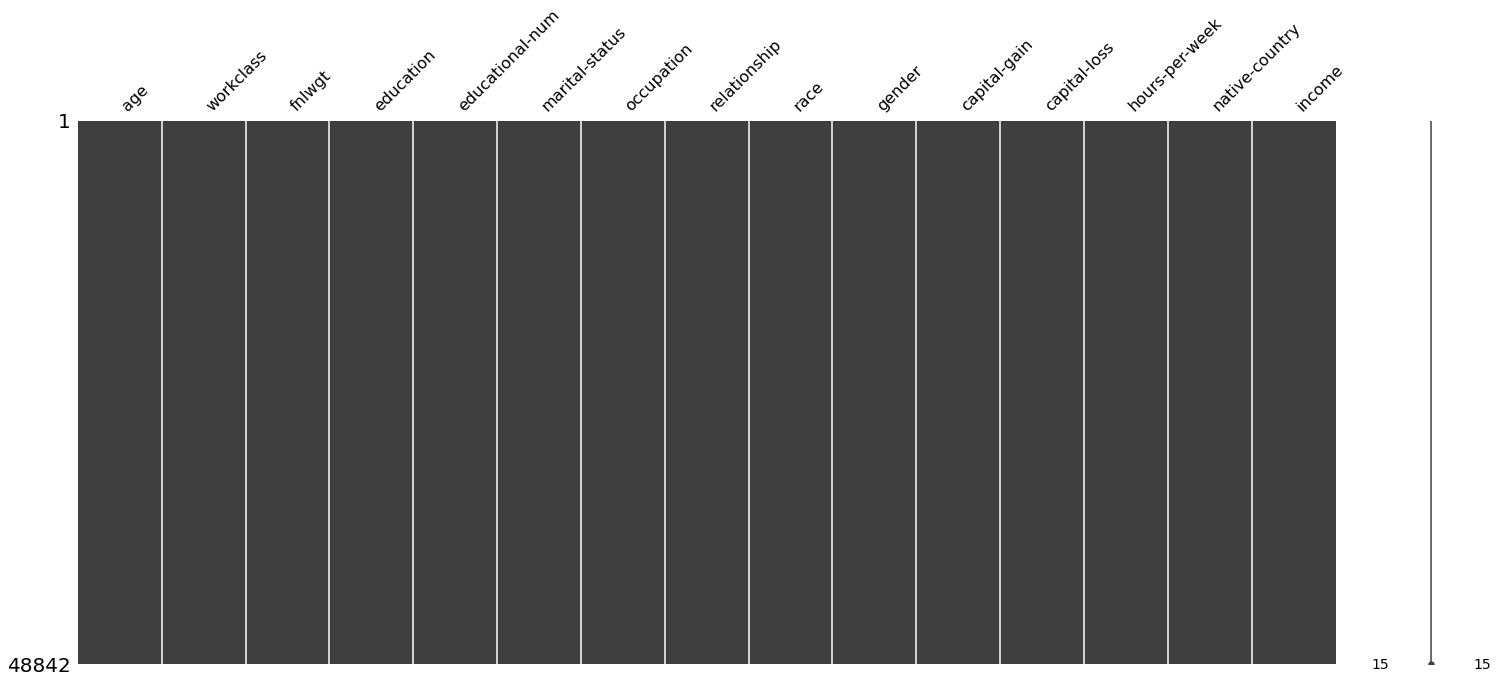

In [13]:
msgn.matrix(df,inline=True)

Analisamos posibles valores nulos dentro de nuestra informacion, no se detectan valores nulos

In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Analisis de la informacion
> - Age : la data se ve correcta, llama la atencion que existan individuos con edad de 90 dado el analisis de salarios siendo que en una edad promedio maxima de trabajo es 65 años 
> - fnlwgt: data se ve correcta no se tiene mayor informacion de esta data 
> - educational-num : la data se ve correcta 
> - capital-gain: no existe informacion en los percentiles 25% 50% 75% por lo cual requiere analisis
> - capital-loss: no existe informacion en los percentiles 25% 50% 75% por lo cual requiere analisis
> - hour-per-week: la informacion presenta datos singulares en el maximo y minimo por lo cual requiere de un mayor analisis

In [18]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [19]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [42]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [52]:
df["collars"] = df["occupation"].replace(["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales",
                                          "Tech-support","Craft-repair", "Machine-op-inspct", "Transport-moving",
                                          "Handlers-cleaners", "Farming-fishing","Protective-serv",
                                          "Priv-house-serv","Other-service", "Armed-Forces", "?"],
                                         ["white-collar", "white-collar", "white-collar", "white-collar",
                                          "white-collar","blue-collar", "blue-collar", "blue-collar",
                                          "blue-collar", "blue-collar", "blue-collar", "blue-collar","other",
                                          "other", np.nan])

In [54]:
df["collars"].value_counts()

white-collar    24819
blue-collar     16276
other            4938
Name: collars, dtype: int64

In [60]:
df['workclass_recod'] = df['workclass'].replace([ "Federal-gov","State-gov", "Local-gov","Self-emp-inc",
                                                 "Self-emp-not-inc", "Never-worked", "Without-pay", "Private","?"],
                                                ['federal-gov','state-level-gov', "state-level-gov",
                                                 "self-employed", "self-employed", "unemployed", "unemployed",
                                                 "private",np.nan])

In [61]:
df['workclass_recod'].value_counts()

private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass_recod, dtype: int64

In [62]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [63]:
df['educ_recod'] = df['education'].replace([ "Preschool","1st-4th", "5th-6th","7th-8th", "9th", "10th",
                                                 "11th", "12th", "HS-grad", "Assoc-voc", "Assoc-acdm",
                                                 "Some-college", "Bachelors", "Masters", "Prof-school",
                                                 "Doctorate"], ["preschool","elementary-school",
                                                                "elementary-school","high-school",
                                                                "high-school", "high-school", "high-school",
                                                                "high-school", "high-school", "college",
                                                                "college", "college","university", "university", "university", "university"])


In [64]:
df['educ_recod'].value_counts()

high-school          21353
college              14540
university           12110
elementary-school      756
preschool               83
Name: educ_recod, dtype: int64

In [66]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [67]:
df['civstatus'] = df['marital-status'].replace([ "Married-civ-spouse", "Married-spouse-absent",
                                                    "Married-AF-spouse", "Divorced","Separated","Widowed","Never-married"],
                                                   ["married","married","married","divorced","separated","widowed","never-married"])

In [68]:
df['civstatus'].value_counts()

married          23044
never-married    16117
divorced          6633
separated         1530
widowed           1518
Name: civstatus, dtype: int64

In [69]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        